In [1]:
import numpy as np

In [2]:
def twopointbvp(N,p,q,r,b1,b2):
    
    import numpy as np, matplotlib.pyplot as plt
    
    c1,k1,a,g1=b1
    c2,k2,b,g2=b2
    
    n = N - 1 + c1 + c2          
    A = np.zeros(( n, n ))
    B = np.zeros(n)
    x = np.linspace( a, b, N + 1 )[ 1 - c1 : N + c2 ]
    y = np.zeros( N + 1 )
    h = ( b - a ) / N
    
    if c1:
        A[ 0, 0 : 3 ] = [ 2 * h * k1 - 3, 4, -1]
        B[0] = 2 * h * g1
        
    else:
        A[ 0, 0 : 2 ]=[ 2 + h**2 * q( x[0] ), 0.5 * h * p( x[0] ) - 1 ]
        B[0] = -h**2 *r( x[0] ) + ( 1 + 0.5 * h * p( x[0] ) ) * g1
        y[0] = g1
        
    if c2:
        A[ n-1, n-3 : n ] = [ 1, -4, 3 + 2 * h * k2 ]
        B[ n - 1 ] = 2 * h * g2
    
    else:
        A[ n-1 , n-2 : n ] = [ -( 1 + 0.5 * h * p( x[n-1] ) ),
                              h**2 * q( x[n-1] ) + 2 ]
        B[n-1] = - h**2 * r( x[n-1] ) + ( 1 - 0.5 * h * p( x[n-1] ) ) * g2
        y[N] = g2
        
    for i in range( 1, n-1):
        A[ i, i-1 : i+2 ]=[ -( 1 + 0.5 * h * p( x[i] ) ),
                           q( x[i] ) * h**2 + 2, 
                           0.5 * h * p( x[i] ) - 1 ]
        B[i] = -h**2 * r( x[i] )
    
    y[ 1-c1 : N+c2 ] = np.linalg.solve( A, B)  
    x=x=np.linspace( a, b, N+1 )
    plt.plot( x, y)
    
    return y


In [3]:
def p(x):
    return -2*x/(1+x**2)

def q(x):
    return 1

def r(x):
    import math
    return (2/(1+x**2)) - math.log(1+x**2)
#The solution is log(1+x**2)

In [4]:
"""
The boundary conditions are given as follows:
b = c, k, x, g
c- coefficient of dy/dx: 0 if Dirichlet, 1 otherwise
k- coefficient of y: 1 if Dirichlet
x- value of x in the boundary
g= value of constant in the boundary condition
""" ;

In [5]:
b1= 0, 1, 0, 0 #Dirichlet
b2= 0, 1, 1, np.log(2) #Dirichlet

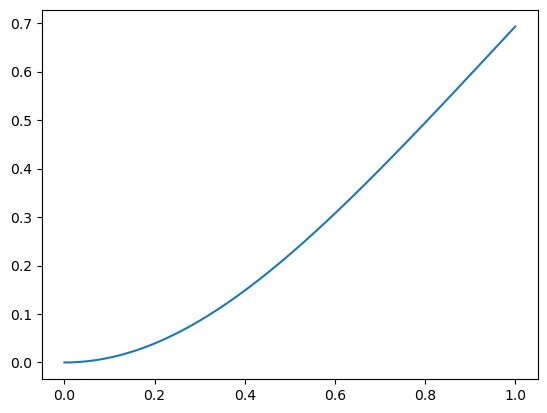

In [6]:
y=twopointbvp(N=100,p=p,q=q,r=r,b1=b1,b2=b2)

In [7]:
b1= 1, 0, 0, 0 #Neumann
b2= 0, 1, 1, np.log(2) #Dirichlet

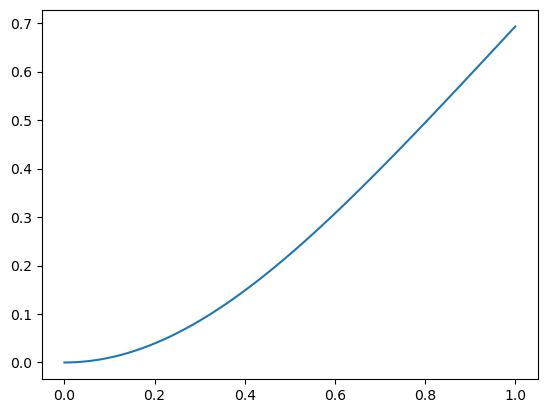

In [8]:
y=twopointbvp(N=100,p=p,q=q,r=r,b1=b1,b2=b2)

In [9]:
b1= 0, 1, 0, 0 #Dirichlet
b2= 1, 0, 1, 1 #Neumann

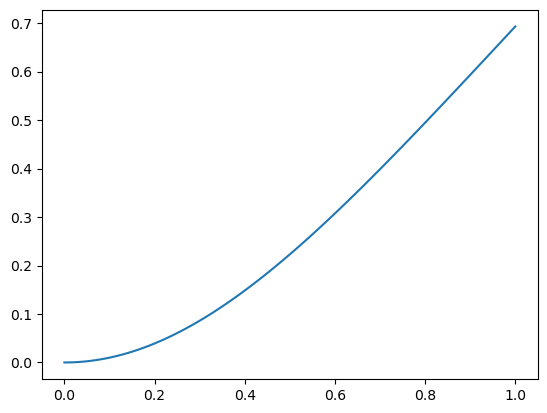

In [10]:
y=twopointbvp(N=100,p=p,q=q,r=r,b1=b1,b2=b2)

In [11]:
b1= 1, 0, 0, 0 #Neumann
b2= 1, 0, 1, 1 #Neumann

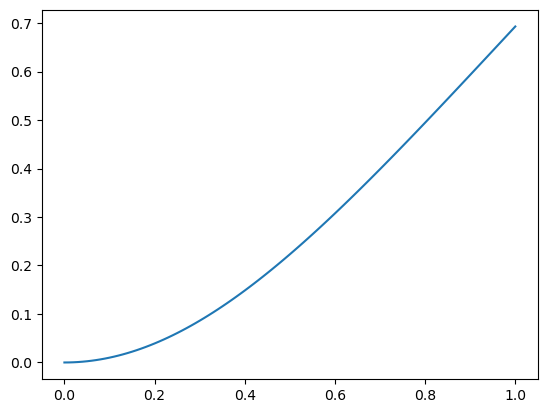

In [12]:
y=twopointbvp(N=100,p=p,q=q,r=r,b1=b1,b2=b2)

In [13]:
b1= 1, 1, 0, 0 #Robin
b2= 1, 1, 1, 1+np.log(2) #Robin

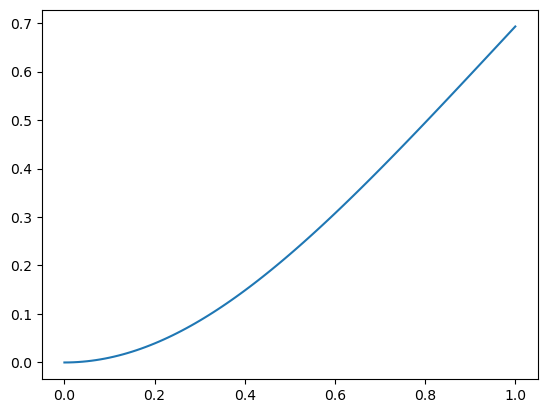

In [14]:
y=twopointbvp(N=100,p=p,q=q,r=r,b1=b1,b2=b2)

In [15]:
#d^y/dx^2=-y
def p(x):
    return 0

def q(x):
    return -1

def r(x):
    return 0

In [16]:
b1= 1, 2, 0, 2 #Robin
b2= 0, 1, np.pi/4, np.cos(np.pi/4) #Dirichlet

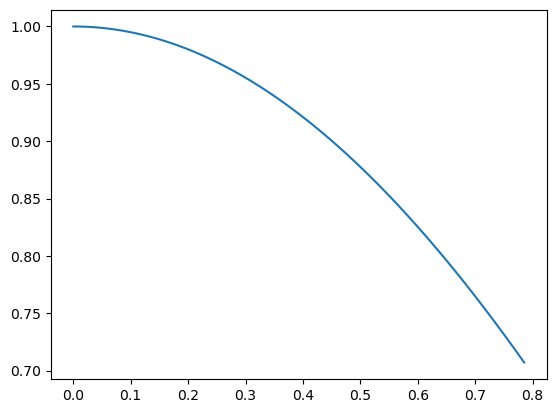

In [17]:
y=twopointbvp(N=100,p=p,q=q,r=r,b1=b1,b2=b2)